In [1]:
"""
Calculation of Bethe-Bloch energy loss with:
- density correction
- cut off energy

MPV calculation with Landau theory
"""

from math import sqrt, log
sqr = lambda x: x*x
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# %matplotlib notebook - enable this to get interactive plot

In [4]:

""" Constants and formulas to be used for pion """
K = 0.307075 # constant K in  MeV cm mol^-1
z = 2 # charge in e Hellium
Z = 18 # Atomic number Z = Argon
A = 40 # Atomic mass in g mol-1
Z_over_A = np.float(Z/A) # Silicon
M = 4*938.27 # Mass of heavy particle - Helium in MeV
m_e = 0.511 # Mass of electron in MeV
#rho = 2.336 # Density of material in g cm^-3 (here: silicon density)
rho = 1.652/1000.   # kg/m^3/10000 - pure argon



gamma = lambda p: sqrt(1 + sqr(p / M))
beta = lambda p: sqrt(1 - 1 / sqr(gamma(p)))
beta_gamma = lambda p: p / M
T_max = lambda p: 2 * m_e * sqr(beta_gamma(p)) / (1 + 2 * gamma(p) * m_e / M + sqr(m_e / M)) # Maximum energy transfer in one collision in MeV
h_omega_p = 0.00003105 # Plasma energy in MeV

T_kin_heavy = lambda p: sqrt( sqr(p) + sqr(M) ) - M

T_cut = 0.06 # Cut energy due to finite thickness of absorber in MeV
I = 0.000173 # Ionisation energy in MeV

""" Constants of density correction """
C = 4.44
a = 0.1492
m = 3.25
X1 = 2.87
X0 = 0.2014
delta0 = 0.14
X = lambda p: np.log10(beta_gamma(p))
#f1 = lambda x: delta0 * 10**(2*(x-X0)) # conductors pdg
f1 = lambda x: 0 # non conductors pdg
f2 = lambda x: 2 * x * np.log(10) - C + (a * ((X1 - x)**m))
f3 = lambda x: 2 * x * np.log(10) + C
delta_full = lambda x: np.piecewise(x, [x < X0 , x >= X0], [f1, f2])

""" Thickness of absorber """
thickness_um = 10000      # 100000
x = thickness_um/10000.0  # x in cm

epsilon = (K * rho * Z * x) / (2 * A) # Has to have units MeV
print( 'epsilon = ', epsilon)
E_mean_delta_corr = lambda p:  epsilon * (log(2 * m_e * T_max(p) * sqr(beta_gamma(p)) / sqr(I)) - 2 * sqr(beta(p)) - delta_full( X(p) ) ) / sqr(beta(p)) # 
E_mean = lambda p:  epsilon * (log(2 * m_e * T_max(p) * sqr(beta_gamma(p)) / sqr(I)) - 2 * sqr(beta(p)) ) / sqr(beta(p)) # 
E_mean_delta_corr_Tcut = lambda p:  epsilon * (log(2 * m_e * T_cut * sqr(beta_gamma(p)) / sqr(I)) - 2 * sqr(beta(p)) * (1 + T_cut/T_max(p)) - delta_full( X(p) ) ) / sqr(beta(p)) # 

E_MPV_LVB = lambda p:  epsilon * ( log( ( 2 * m_e * sqr( beta_gamma(p) ) ) / I ) + log( epsilon / ( I * sqr(beta(p)) ) ) +  0.2 - sqr( beta(p) ) - delta_full( X(p) ) )  / sqr(beta(p)) # pdg

E_MPV_limit = lambda p:  epsilon * ( log( ( 2 * m_e * epsilon ) / sqr(h_omega_p) )  +  0.2 )


epsilon =  0.00011413977749999998


In [5]:

""" Calculation of all formulas in momentum range ps """

ps = np.logspace(1, 5, 1000) # MeV

dE_over_dX_pions = np.zeros(len(ps))
dE_over_dX_Tcut_pions = np.zeros(len(ps))

beta_gammas = np.zeros(len(ps))
Xs = np.zeros(len(ps))
density_correction = np.zeros(len(ps))
betas = np.zeros(len(ps))
ps_GeV = np.zeros(len(ps))

E_means = np.zeros(len(ps))
E_mean_density_corr = np.zeros(len(ps))
E_mean_density_corr_Tcut = np.zeros(len(ps))

E_MPVs_Landau = np.zeros(len(ps))
E_MPVs_Landau_limit = np.zeros(len(ps))

T_kins = np.zeros(len(ps))

for pi in range(0, len(ps)):
	# dE_over_dX_pions[pi] = dE_over_dX(ps[pi])
	# dE_over_dX_Tcut_pions[pi] = dE_over_dX_Tcut(ps[pi])

	beta_gammas[pi] = beta_gamma(ps[pi])
	density_correction[pi] = delta_full(ps[pi])
	betas[pi] = beta(ps[pi])
	
	Xs[pi] = X( ps[pi] )	
	E_mean_density_corr[pi] = E_mean_delta_corr( ps[pi] ) * 1000
	E_mean_density_corr_Tcut[pi] = E_mean_delta_corr_Tcut( ps[pi] ) * 1000
	E_means[pi] = E_mean( ps[pi] ) * 1000
	E_MPVs_Landau[pi] = E_MPV_LVB( ps[pi] ) * 1000
	E_MPVs_Landau_limit[pi] = E_MPV_limit( ps[pi] ) * 1000
	ps_GeV[pi] = ps[pi]/1000.0

	T_kins[pi] = T_kin_heavy( ps[pi] )
	
#print ' betas = ', betas
dE_pions_450um = np.multiply(dE_over_dX_pions, 0.045*1000)
dE_pions_Tcut_450um = np.multiply(dE_over_dX_Tcut_pions, 0.045*1000)


/home/stephan/alice/sw/ubuntu1804_x86-64/Python-modules/1.0-3/share/python-modules/lib/python/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in power


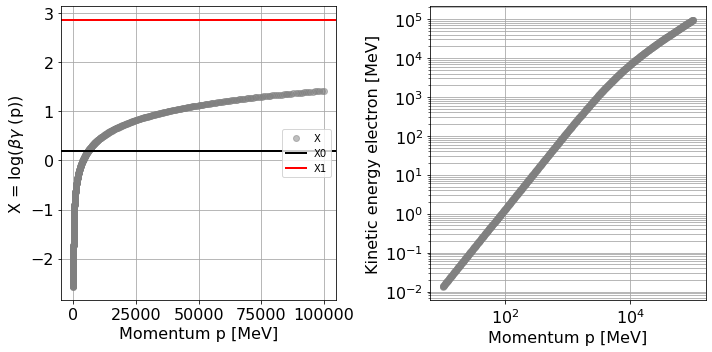

In [6]:
fig = plt.figure('Density correction control plot of X=log10(beta(p)*gamma(p))', figsize=(10, 5))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,2,1)
my_font = 16
plt.tick_params(axis='both', which='major', labelsize=my_font)
plt.plot(ps, Xs, label='X', marker='o', color='Gray', linestyle='', linewidth=5, alpha=0.5)
plt.grid(True, which="both", ls="-", color='0.65')
plt.axhline(X0, label = 'X0', color='Black', linewidth=2)
plt.axhline(X1, label = 'X1', color='Red', linewidth=2)
plt.ylabel(r'X = log($\beta\gamma$ (p))', fontsize = my_font)
plt.xlabel('Momentum p [MeV]', fontsize = my_font)
plt.legend(loc='center right')

ax2 = fig.add_subplot(1,2,2)
my_font = 16
plt.tick_params(axis='both', which='major', labelsize=my_font)
plt.plot(ps, T_kins, label='', marker='o', color='Gray', linestyle='', linewidth=5, alpha=0.5)
plt.grid(True, which="both", ls="-", color='0.65')
plt.ylabel('Kinetic energy electron [MeV]', fontsize = my_font)
plt.xlabel('Momentum p [MeV]', fontsize = my_font)
#plt.legend(loc='center right')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.tight_layout()

plt.savefig('Bethe-control-plot-heavy-particle.png')
plt.savefig('Bethe-control-plot-heavy-particle.svg')
plt.show()
#plt.clf()
#plt.close()


min  1.19947362945855 [15.53070574]


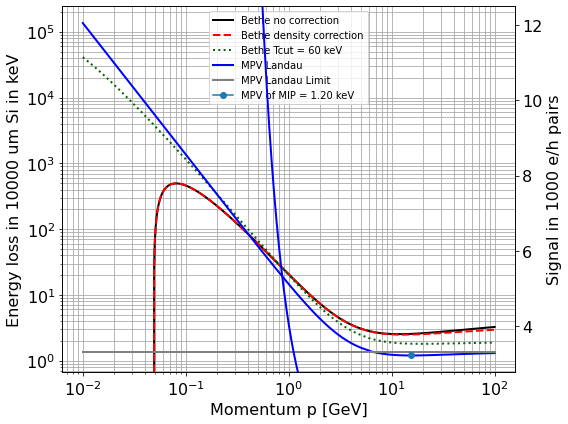

In [8]:

""" Plot Bethe versus momentum """

fig, ax1 = plt.subplots()
fig.patch.set_facecolor('white')
fig.set_size_inches(8,6)

plt.tick_params(axis='both', which='major', labelsize=my_font)
plt.yscale('log')
ax1.plot(ps_GeV, E_means, label='Bethe no correction', marker='', color='Black', linestyle='-', linewidth=2)
ax1.plot(ps_GeV, E_mean_density_corr, label='Bethe density correction', marker='', color='Red', linestyle='--', linewidth=2)
ax1.plot(ps_GeV, E_mean_density_corr_Tcut, label='Bethe Tcut = 60 keV', marker='', color='DarkGreen', linestyle=':', linewidth=2)

ax1.plot(ps_GeV, E_MPVs_Landau, label='MPV Landau', marker='', color='Blue', linestyle='-', linewidth=2)
ax1.plot(ps_GeV, E_MPVs_Landau_limit, label='MPV Landau Limit', marker='', color='Gray', linestyle='-', linewidth=2)

ps_min = ps_GeV[np.where(E_MPVs_Landau[:] == np.min(E_MPVs_Landau))]
print( 'min ', np.min(E_MPVs_Landau), ps_min)
plt.plot(ps_min, np.min(E_MPVs_Landau), marker = 'o', label = 'MPV of MIP = %.2f keV'%np.min(E_MPVs_Landau))

plt.grid(True, which="both", ls="-", color='0.65')
#plt.axvline(120000, label = '120 GeV pions', color='Gray', linewidth=5)
ax1.set_xscale('log')
plt.ylabel('Energy loss in '+str(thickness_um)+' um Si in keV', fontsize = my_font)
plt.xlabel('Momentum p [GeV]', fontsize = my_font)
plt.legend(loc='upper center')

ax2 = ax1.twinx()
energy_to_charge = 3.6
s2 = np.divide(E_MPVs_Landau, energy_to_charge)
ax2.plot(ps_GeV, s2, marker='', color='Blue', linestyle='-', linewidth=2)
ax2.set_ylim(10/energy_to_charge, 45/energy_to_charge)
ax2.set_ylabel('Signal in 1000 e/h pairs', fontsize = my_font)

plt.tick_params(axis='both', which='major', labelsize=my_font)
plt.tight_layout()

#plt.savefig('Bethe-for-thickness-'+str(thickness_um)+'um-heavy.png')
#plt.savefig('Bethe-for-thickness-'+str(thickness_um)+'um-heavy.svg')
plt.show()
#plt.clf()
#plt.close()



In [ ]:
#E_means